***
# Exploration des données
***

Note : 
Extraire les nom propres
faire une liste des mots les plus populaires
Analyser les émoji
L'usage de majuscule
Graph les top mot par catégorie

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
# ====== Idées ====== #
# Ajout d'une variable confinement 

***
Merge les données
***

In [5]:
df_post = pd.read_csv('Posts.csv')
df_post.head(2)

,attachments.data,created_time,id,mainTopic,message,permalink_url,secondTopic,shares,title
0,"[{""title"":""Une électrification à « la mesure d...",2023-06-02T16:53:58+0000,192978590727638_722512569880131,consommation,CHRONIQUE / La Société des traversiers du Québ...,https://www.facebook.com/553956616735728/posts...,auto,0,Une électrification à « la mesure des besoins ...
1,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence


In [6]:
df_comments = pd.read_csv('Comments.csv')
df_comments.head(2)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time,id,like_count,message,parent,postId
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613


In [7]:
df_merge = pd.merge(df_comments, df_post, left_on='postId', right_on='id', indicator=True)
df_merge.head(2)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time_x,id_x,like_count,message_x,parent,postId,attachments.data,created_time_y,id_y,mainTopic,message_y,permalink_url,secondTopic,shares,title,_merge
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence,both
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence,both


In [8]:
# Analyse du merge 
unique_list = []
for value in df_merge['_merge'].unique():
    unique_list.append(value)
print(unique_list)
print('Tous les lignes merge')

['both']
Tous les lignes merge


***
Visualisation
***

In [32]:
df_merge.shape

(935698, 23)

In [7]:
# Analyse statistique
df_merge.describe()

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count,shares
count,9.356980e+05,935698.000000,935698.000000,9.356980e+05,935698.000000,935698.000000,935698.000000,935698.000000,935698.000000
mean,1.141216e-02,0.108959,0.052533,1.360216e-02,0.010173,0.102460,0.520507,1.321623,285.970075
std,4.006699e-02,0.162994,0.119968,5.610636e-02,0.035129,0.140141,2.988751,5.972633,1853.642335
min,3.613072e-08,0.002280,0.000000,3.725290e-08,0.000000,0.000005,0.000000,0.000000,0.000000
25%,5.225947e-04,0.009470,0.008879,4.220009e-04,0.005321,0.008294,0.000000,0.000000,7.000000
50%,1.581658e-03,0.027476,0.011270,1.215935e-03,0.005495,0.034277,0.000000,0.000000,27.000000
75%,5.475683e-03,0.136078,0.022150,4.673004e-03,0.006233,0.151034,0.000000,1.000000,110.000000
max,9.491525e-01,0.973575,0.998037,9.502075e-01,0.968038,0.981763,252.000000,836.000000,25872.000000


In [8]:
# Valeurs manquantes
print('Missing value')
print('*'*25)
print(f'Nombre de lignes : {len(df_merge)}')
for col in df_merge.columns.to_list():
    nb_na = df_merge[col].isna().sum()
    perc = round(df_merge[col].isna().sum()/len(df_merge)*100)
    print(f'{col.ljust(20)} : {str(nb_na).rjust(10)} ({perc}%)')

Missing value
*************************
Nombre de lignes : 935698
IDENTITY_ATTACK      :          0 (0%)
INSULT               :          0 (0%)
PROFANITY            :          0 (0%)
SEVERE_TOXICITY      :          0 (0%)
THREAT               :          0 (0%)
TOXICITY             :          0 (0%)
comment_count        :          0 (0%)
created_time_x       :          0 (0%)
id_x                 :          0 (0%)
like_count           :          0 (0%)
message_x            :          0 (0%)
parent               :     459661 (49%)
postId               :          0 (0%)
attachments.data     :         35 (0%)
created_time_y       :          0 (0%)
id_y                 :          0 (0%)
mainTopic            :       8481 (1%)
message_y            :      10158 (1%)
permalink_url        :          0 (0%)
secondTopic          :      67076 (7%)
shares               :          0 (0%)
title                :       8457 (1%)
_merge               :          0 (0%)


In [9]:
# Data type
for col in df_merge.columns:
    print(f'{col.ljust(20)}: {df_merge[col].dtype}')

IDENTITY_ATTACK     : float64
INSULT              : float64
PROFANITY           : float64
SEVERE_TOXICITY     : float64
THREAT              : float64
TOXICITY            : float64
comment_count       : int64
created_time_x      : object
id_x                : object
like_count          : int64
message_x           : object
parent              : object
postId              : object
attachments.data    : object
created_time_y      : object
id_y                : object
mainTopic           : object
message_y           : object
permalink_url       : object
secondTopic         : object
shares              : int64
title               : object
_merge              : category


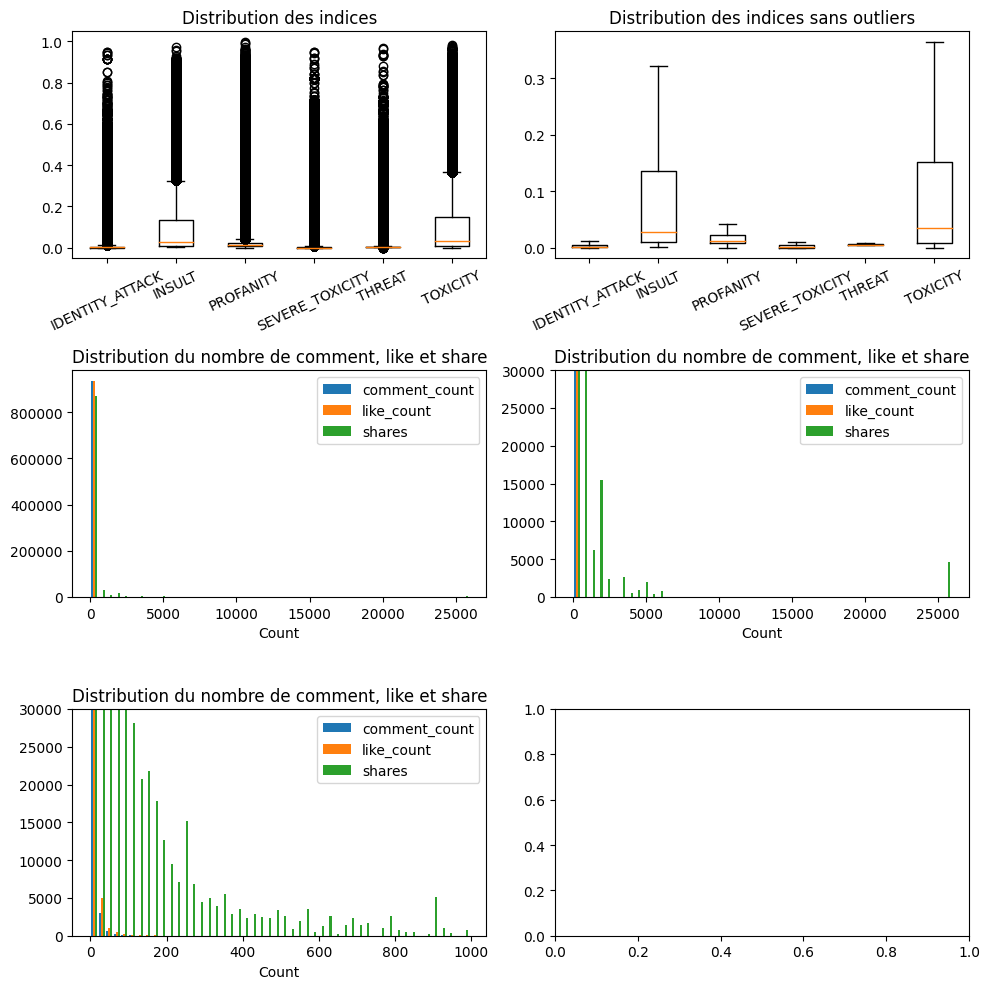

In [10]:
#====== Attributs numériques ======#

# 	    ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY', 'comment_count', 'like_count', 'shares']
#   - Boxplot avec courbe pour les indices
#   - histogramme pour comment_count, like_count, shares

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

indice_df = df_merge[['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY']]
cols_indice = ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY']
cols_count = ['comment_count', 'like_count', 'shares']
filtered_data = df_merge.loc[(df_merge['comment_count']<1000) & (df_merge['like_count']<1000) & (df_merge['shares']<1000)]


figure, axis = plt.subplots(3,2, figsize=(10,10))

# variable indice 
axis[0, 0].boxplot(indice_df)
axis[0, 0].set_title('Distribution des indices')
axis[0, 0].set_xticklabels(cols_indice, rotation=25)

# variable indice sans outliers
axis[0, 1].boxplot(indice_df, showfliers=False)
axis[0, 1].set_title('Distribution des indices sans outliers')
axis[0, 1].set_xticklabels(cols_indice, rotation=25)

# Comment_count, like_count, shares
axis[1, 0].hist(df_merge[['comment_count', 'like_count', 'shares']], bins=50)
axis[1, 0].set_title('Distribution du nombre de comment, like et share')
axis[1, 0].set_xlabel('Count')
axis[1, 0].legend(cols_count)

axis[1, 1].hist(df_merge[['comment_count', 'like_count', 'shares']], bins=50)
axis[1, 1].set_title('Distribution du nombre de comment, like et share')
axis[1, 1].set_xlabel('Count')
axis[1, 1].legend(cols_count)
axis[1, 1].set_ylim(0, 30000)

axis[2, 0].hist(filtered_data[['comment_count', 'like_count', 'shares']], bins=50)
axis[2, 0].set_title('Distribution du nombre de comment, like et share')
axis[2, 0].set_xlabel('Count')
axis[2, 0].legend(cols_count)
axis[2, 0].set_ylim(0, 30000)

figure.tight_layout()
plt.show()

In [36]:
df_merge.quantile([.25,.5,.75,.95])

# IDENTITY_ATTACK : 95% des points ont un score de 0.049989 ou moins 

C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_16124\115348012.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.quantile([.25,.5,.75,.95])


,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count,shares
0.25,0.000523,0.009470,0.008879,0.000422,0.005321,0.008294,0.0,0.0,7.0
0.50,0.001582,0.027476,0.011270,0.001216,0.005495,0.034277,0.0,0.0,27.0
0.75,0.005476,0.136078,0.022150,0.004673,0.006233,0.151034,0.0,1.0,110.0
0.95,0.049989,0.486277,0.315817,0.024444,0.011560,0.400609,2.0,6.0,778.0


In [37]:
#====== Attributs catégoriques ======#

#       ['attachments.data', 'message_x', 'message_y', 'mainTopic, 'secondTopic', 'title']
#   - Extraire l'info de attachments.data
#   - Renommer message_x : message_commentaire, message_y : message_post
#   - Graph histogramme avec les top 20 'mainTopic, 'secondTopic'

#   - mettre les phrase en liste de mots et comptabiliser les mots qui ressort le plus : 'message_x', 'message_y', 'title' 
#   - Voir graph avec plein de mots

maintopic = df_merge.groupby('mainTopic').size().to_frame('count').sort_values(by=['count'], ascending=False).reset_index()
top_maintopic = maintopic.loc[maintopic.index < 100]
top_maintopic.to_excel('top_maintopic.xlsx')
top_maintopic.head()

# figure, axis = plt.subplots(2,2, figsize=(8,8))

# axis[0,0].hist(top_maintopic[['count']], bins=50)

# figure.tight_layout()
# plt.show()

,mainTopic,count
0,actualite,343101
1,2022,147892
2,actualites,94162
3,2023,72744
4,opinions,50246


In [39]:
secondtopic = df_merge.groupby('secondTopic').size().to_frame('count').sort_values(by=['count'], ascending=False).reset_index()
top_secondtopic = secondtopic.loc[secondtopic.index < 100]
top_secondtopic.to_excel('top_secondtopic.xlsx')
top_maintopic.head()



,mainTopic,count
0,actualite,343101
1,2022,147892
2,actualites,94162
3,2023,72744
4,opinions,50246


In [13]:
print(f'Nombre de ligne : {len(df_merge)}')
print(f'Nombre de valeurs uniques : {len(df_merge["title"].unique())}')

# Donc plusieurs commentaire proviennent de la même publication originale? 
# Extraire le sujet en 1 mots? comment faire? 

Nombre de ligne : 935698
Nombre de valeurs uniques : 24941


In [14]:
#====== Mesures Statistiques ======#
# Moyenne, médiane, mode
# Corrélation 
#   - Scatter plot
#   - heat map
# Outliers

# Pour attributs catégoriques : encoder???


In [77]:
cols = ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY', 'comment_count', 'like_count', 'shares']

correlation_matrix = df_merge[cols].corr()
correlation_matrix

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count,shares
IDENTITY_ATTACK,1.000000,0.472370,0.386849,0.563332,0.198491,0.500656,0.013331,0.001692,-0.022791
INSULT,0.472370,1.000000,0.708261,0.606338,0.229217,0.980997,0.002161,0.011629,-0.051471
PROFANITY,0.386849,0.708261,1.000000,0.711646,0.198757,0.767025,-0.019071,-0.024835,-0.023714
SEVERE_TOXICITY,0.563332,0.606338,0.711646,1.000000,0.483134,0.656620,-0.014716,-0.020532,-0.016953
THREAT,0.198491,0.229217,0.198757,0.483134,1.000000,0.278502,0.002018,-0.003004,0.002979
TOXICITY,0.500656,0.980997,0.767025,0.656620,0.278502,1.000000,0.003992,0.011662,-0.052589
comment_count,0.013331,0.002161,-0.019071,-0.014716,0.002018,0.003992,1.000000,0.445164,-0.011305
like_count,0.001692,0.011629,-0.024835,-0.020532,-0.003004,0.011662,0.445164,1.000000,-0.011328
shares,-0.022791,-0.051471,-0.023714,-0.016953,0.002979,-0.052589,-0.011305,-0.011328,1.000000


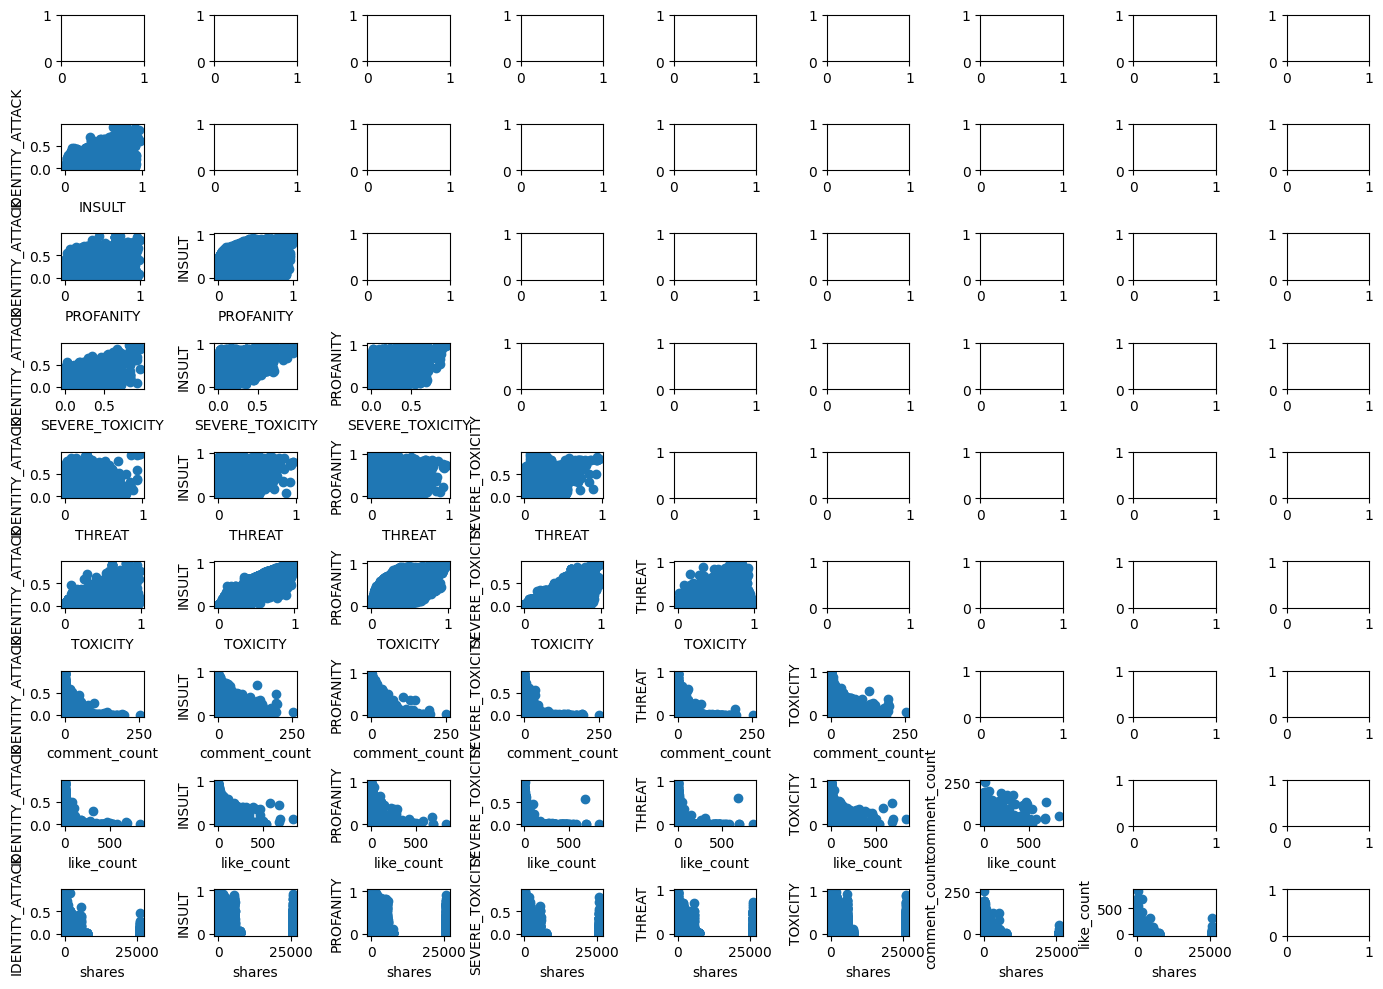

In [78]:
# Corrélation : 

figure, axis = plt.subplots(len(cols), len(cols), figsize=(14,10))

for i in range(0, len(cols)) : 
    for j in range(0, len(cols)):
        if i > j :
            ax = axis[i, j]
            ax.scatter(x=df_merge[cols[i]], y=df_merge[cols[j]])
            ax.set_xlabel(cols[i])
            ax.set_ylabel(cols[j])

figure.tight_layout()
plt.show()

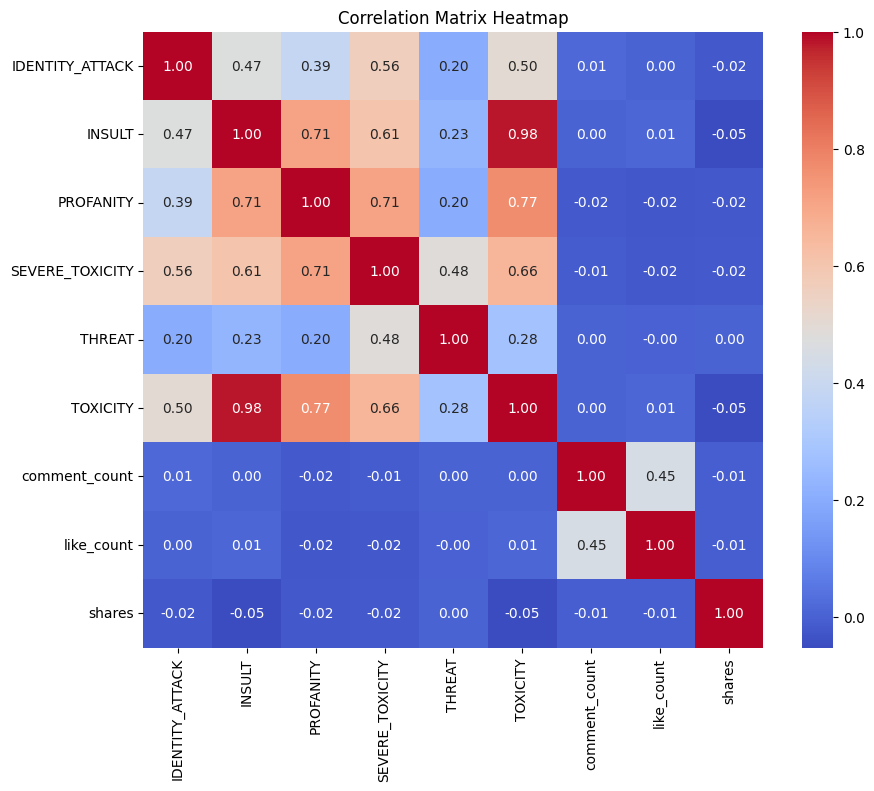

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=cols, yticklabels=cols)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
#====== Analyse de la période de temps ======#

# ['created_time_x', 'created_time_y']
print(max(df_merge['created_time_x']))
print(min(df_merge['created_time_x']))

print(max(df_merge['created_time_y']))
print(min(df_merge['created_time_y']))

# Voir s'il y a augmentation de post associé à des événements marquants au cours de cette période
# Saisonnalité?
# Covid

# Est-ce que l'heure pourrait avoir un impact? 


2023-06-15T19:42:20+0000
2020-02-27T21:54:07+0000
2023-06-02T16:03:24+0000
2020-02-27T21:27:34+0000


C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_16124\2853082203.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(labels=group_year['year_x'], rotation=90)
C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_16124\2853082203.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(labels=group_year_month['year_month_x'], rotation=90)


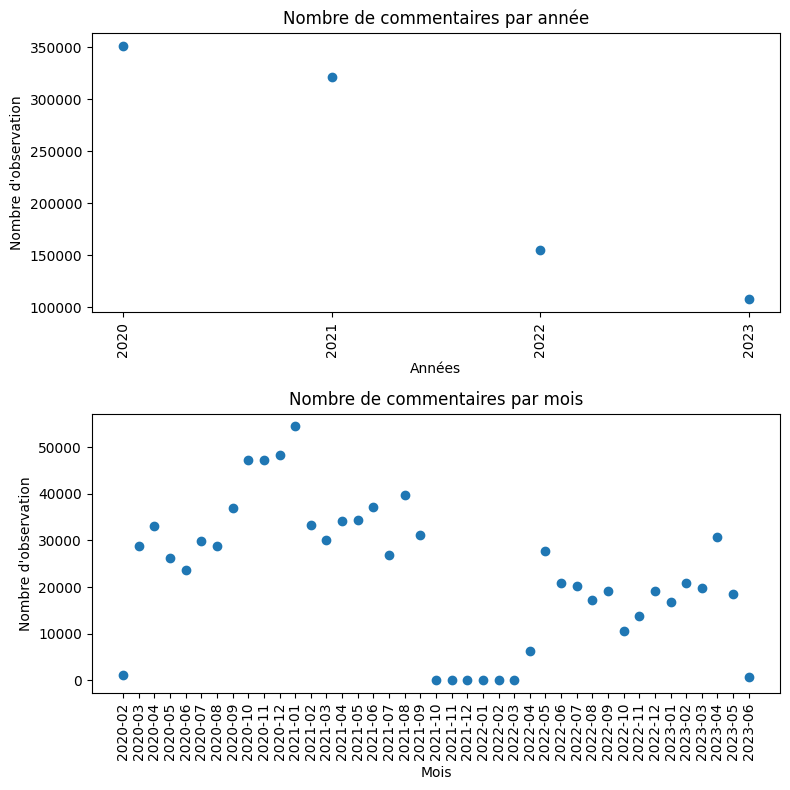

In [43]:
df_merge['year_x'] = df_merge['created_time_x'].str[0:4]
df_merge['month_x'] = df_merge['created_time_x'].str[5:7].astype(int)
df_merge['year_month_x'] =  df_merge['created_time_x'].str[0:7]

group_year = df_merge.groupby('year_x').size().to_frame('count').reset_index()
group_year

group_year_month = df_merge.groupby('year_month_x').size().to_frame('count').reset_index()
group_year_month

figure, axis = plt.subplots(2,1, figsize=(8,8))
axis[0].scatter(x=group_year['year_x'], y=group_year['count'])
axis[0].set_xticklabels(labels=group_year['year_x'], rotation=90)
axis[0].set_title('Nombre de commentaires par année')
axis[0].set_xlabel('Années')
axis[0].set_ylabel('Nombre d\'observation')

axis[1].scatter(x=group_year_month['year_month_x'], y=group_year_month['count'])
axis[1].set_xticklabels(labels=group_year_month['year_month_x'], rotation=90)
axis[1].set_title('Nombre de commentaires par mois')
axis[1].set_xlabel('Mois')
axis[1].set_ylabel('Nombre d\'observation')

figure.tight_layout()
plt.show()

In [83]:
# dispersion dans la journée (heure)
# dispersion dans la semaine 


figure, axis = plt.subplots(2, 2, figsize=(14,10))

# for i in range(0, len(cols)) : 
#     for j in range(0, len(cols)):
#         if i > j :
#             ax = axis[i, j]
#             ax.scatter(x=df_merge[cols[i]], y=df_merge[cols[j]])
#             ax.set_xlabel(cols[i])
#             ax.set_ylabel(cols[j])

axis[0,0].scatter(x=df_merge['created_time_x'], y=df_merge['IDENTITY_ATTACK'])

figure.tight_layout()
plt.show()

KeyboardInterrupt: 

In [17]:
#====== Piste de solution ======#
# Extraire les noms de personne (trouver une répertoire de noms?)
# Extraire les Émoji
# Extraire les #tag

In [1]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ------------------- -------------------- 143.4/300.0 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Charles_tour\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

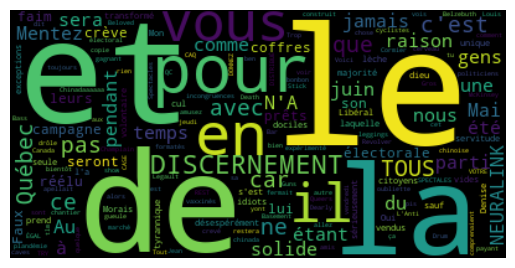

In [10]:
#====== Graph de mots ======#

# Nécessaire un filtrage pour garder les noms et verbes

text_col = df_merge[['message_x']].loc[(df_merge.index < 10)]
text_col

text = []
for i, message in enumerate(text_col['message_x']):
    text.append(message)
text

wordcloud = WordCloud().generate(' '.join(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
text

['Faux, ce ne sera jamais le temps pour lui car il ne sera pas réélu et que son parti crève de faim. Jamais ils ne seront prêts pour une campagne électorale, leurs coffres étant désespérément vides. C\'est la seule et unique raison pour laquelle il s\'est transformé en "lèche-cul" du parti Libéral.',
 'Mon dieu!! On nous prend sérieusement pour des idiots 😅',
 'Denise Morais ..Oui et avec raison ! (Car "nous ",  étant la majorité tyrannique des citoyens vendus et  "dociles"  à la   servitude volontaire , sauf exceptions . )  On l\'a expérimenté solide avec  McKinsey et les incongruences des politiciens .) ..."Mentez, mentez , il en restera toujours quelque chose" ... Au Québec ,c\'est gagnant car les gens sont formatés solide !',
 'Gros show. Mais pendant la plandémie chinoise tlm fermait bien sa gueule..',
 'On apellait ça chinada pis les vaxxinés comprenaient rien tu vois ben que yont pas de cerveau',
 'Chinadaaaaaa',
 "Trop drôle,  crevé les caves , vous allez voir que cyclistes en 

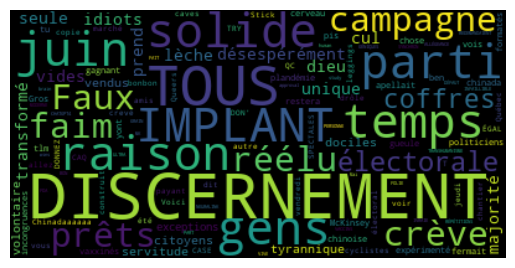

In [16]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load SpaCy French model
nlp = spacy.load("fr_core_news_sm")


# Join the list of strings into a single string
text_combined = ' '.join(text)

# Process the text with SpaCy
doc = nlp(text_combined)

# Keep only words and verbs
filtered_text = [token.text for token in doc if token.pos_ in ['VERB', 'NOUN', 'ADJ']]

# Generate WordCloud
wordcloud = WordCloud().generate(' '.join(filtered_text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
